In [3]:
import cv2, numpy as np
from matplotlib import pyplot as plt

imq = cv2.imread("./iqry2.png")
imt = cv2.imread("./iref2.png")

def display(m: cv2.typing.MatLike, f: plt) -> None:
    f.imshow(cv2.cvtColor(m, cv2.COLOR_BGR2RGB))
    f.axis('off')
    f.show()

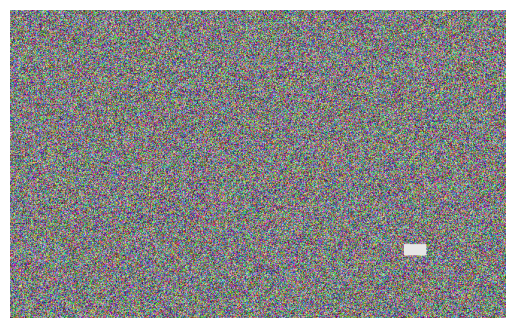

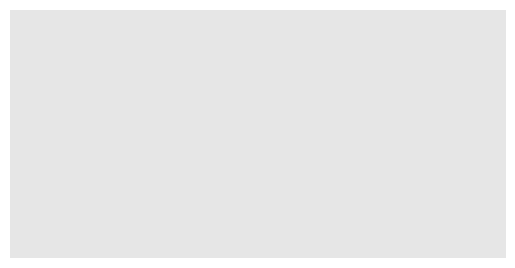

In [4]:
display(imq, plt)
display(imt, plt)

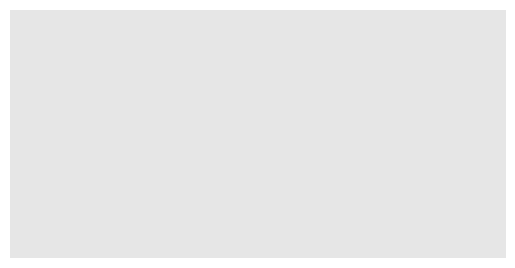

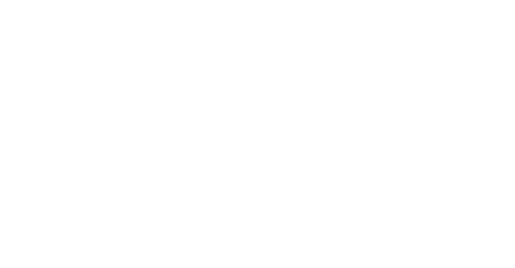

1.0
0.84666735
[(np.int64(311), np.int64(524)), (np.int64(312), np.int64(523)), (np.int64(312), np.int64(524)), (np.int64(312), np.int64(525)), (np.int64(312), np.int64(526))]


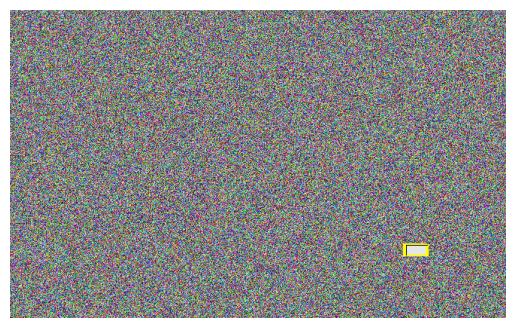

In [5]:
im = imq
template = imt

baseimg = im.copy()
h, w = template.shape[:-1]

display(template, plt)
#mask = template.copy(
mask = np.zeros(template.shape, dtype=template.dtype)
mask[:] = 255
# mask[:h//2] = 0
# mask[h//2:] = 0
display(mask, plt)

res = cv2.matchTemplate(im, template, cv2.TM_CCORR_NORMED)
# res = cv2.matchTemplate(im, template, cv2.TM_CCOEFF_NORMED, mask=mask)
# # mask results in nans and infs https://github.com/opencv/opencv/issues/23257
# res[res == float('nan')] = 0
# res[res == float('inf')] = 0

print(np.max(res))
print(np.min(res))

threshold = 0.99
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(baseimg, (pt[0]+1,pt[1]+1), (pt[0] + w, pt[1] + h), (0,0,0), 1)
    cv2.rectangle(baseimg, pt, (pt[0] + w, pt[1] + h), (0,255,255), 1)
print(list(zip(*loc))[:10])

display(baseimg, plt)

1.0


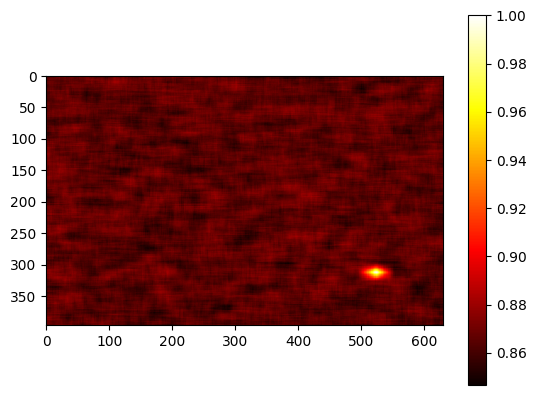

In [6]:
a = res.copy()
# a[a < 0] = 0
# a[a > 0.8] = 2
a[np.isnan(a)] = 0
a[np.isinf(a)] = 0
print(np.max(a))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

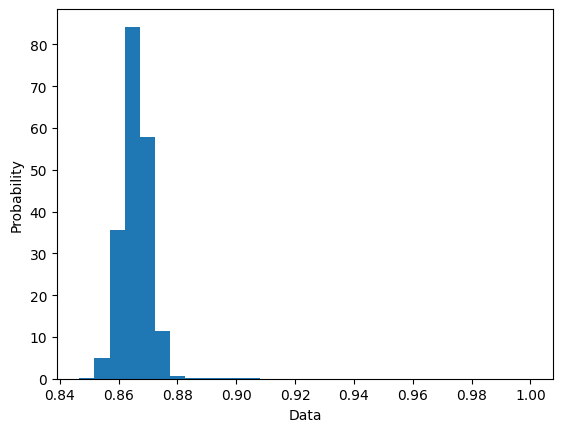

In [7]:
plt.hist(res[(res >= -1) & (res <= 1)].flat, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()